Confusion Matrix:
[[   0    6   43]
 [   0   89   91]
 [   0   24 1088]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        49
     Neutral       0.75      0.49      0.60       180
    Positive       0.89      0.98      0.93      1112

    accuracy                           0.88      1341
   macro avg       0.55      0.49      0.51      1341
weighted avg       0.84      0.88      0.85      1341

Overall Accuracy: 0.88


C:\Users\Rhayven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rhayven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rhayven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


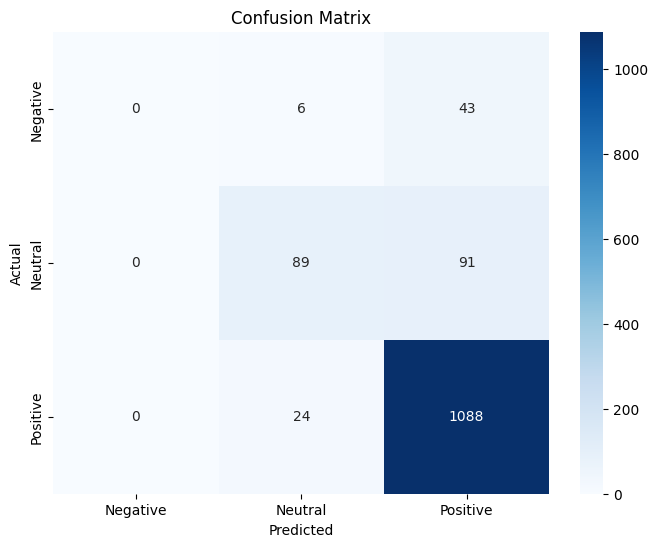

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Rhayven\Downloads\FB_RobinPadilla_sentiment_improved.csv")

X = df['comment']
y = df['final_sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_classifier, X_tfidf, y, cv=skf)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y, y_pred))

accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
fold_results = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    fold_results.append(accuracy)

average_accuracy = np.mean(fold_results)

table_data = []
for i, accuracy in enumerate(fold_results):
    table_data.append([i + 1, accuracy])

print("Fold | Accuracy")
print("-----|---------")
for row in table_data:
    print(f"{row[0]:4} | {row[1]:.4f}")
print("-----|---------")
print(f"Avg  | {average_accuracy:.4f}")

Fold | Accuracy
-----|---------
   1 | 0.9037
   2 | 0.8806
   3 | 0.8433
   4 | 0.8806
   5 | 0.8731
   6 | 0.8806
   7 | 0.8657
   8 | 0.9030
   9 | 0.9030
  10 | 0.8433
-----|---------
Avg  | 0.8777
